In [23]:
import torch
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import mne

In [11]:
param_dir = '/home/ncclab/shen**/att_model/CLISA_Hydra/params/FACEDnewdata/FACEDnewdata/segatt_15_r13_f0_best.ckpt'
state_dict = torch.load(param_dir)
print(state_dict['state_dict'].keys())
print(state_dict['state_dict']['model.timeConv.weight'].shape)

odict_keys(['model.timeConv.weight', 'model.timeConv.bias', 'model.msConv1.weight', 'model.msConv1.bias', 'model.msConv2.weight', 'model.msConv2.bias', 'model.msConv3.weight', 'model.msConv3.bias', 'model.msConv4.weight', 'model.msConv4.bias', 'model.att_conv.weight', 'model.att_conv.bias', 'model.att_pointConv.weight', 'model.att_pointConv.bias', 'model.timeConv1.weight', 'model.timeConv1.bias', 'model.timeConv2.weight', 'model.timeConv2.bias'])
torch.Size([16, 1, 1, 30])


(16, 30)
Temporal filter: 0


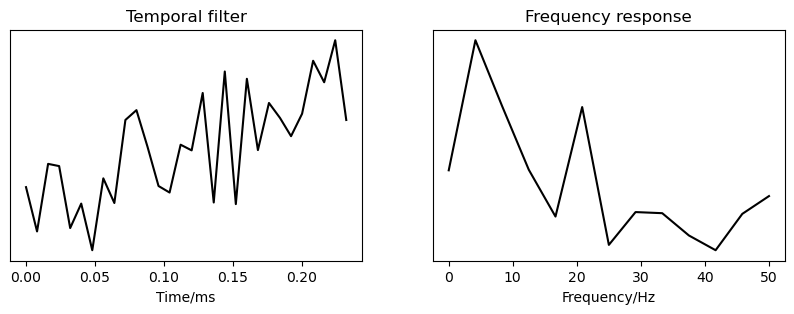

Temporal filter: 1


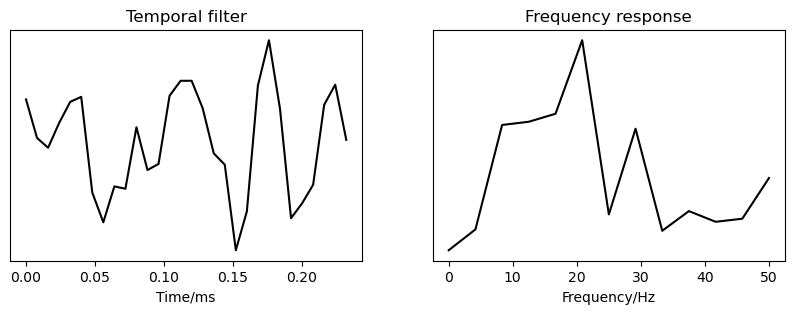

Temporal filter: 2


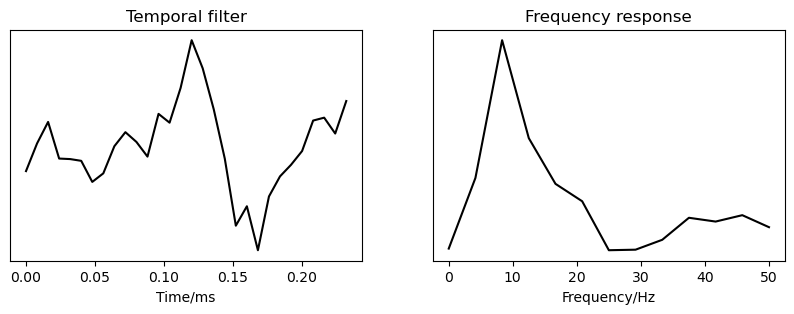

Temporal filter: 3


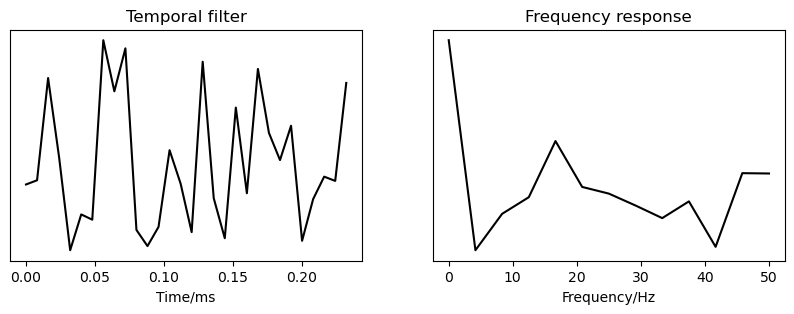

Temporal filter: 4


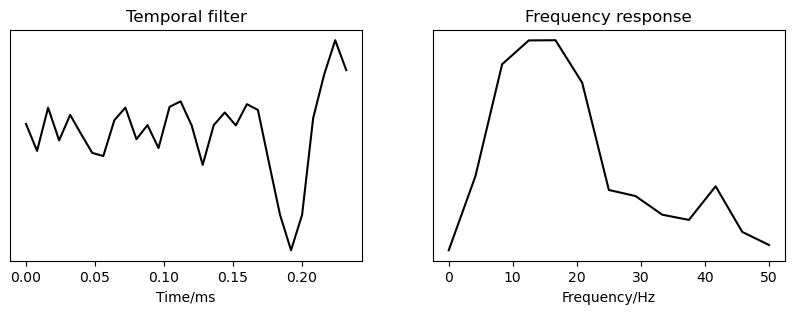

Temporal filter: 5


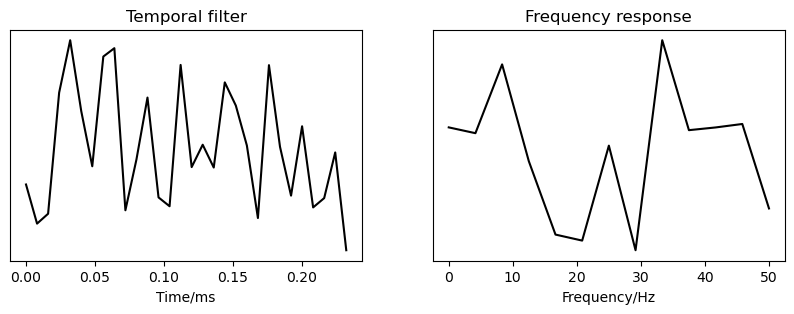

Temporal filter: 6


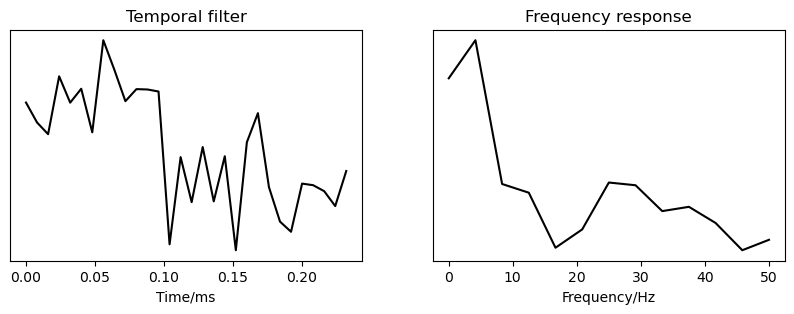

Temporal filter: 7


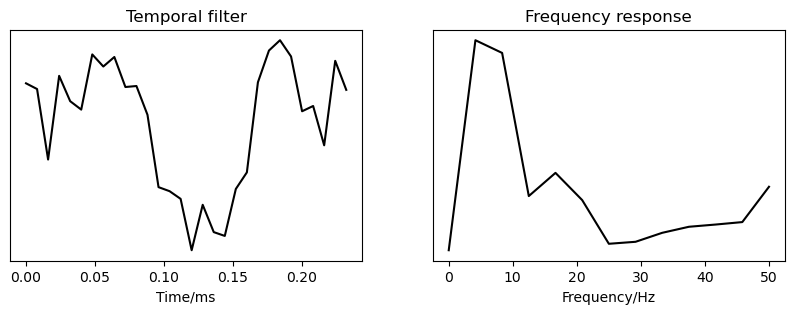

Temporal filter: 8


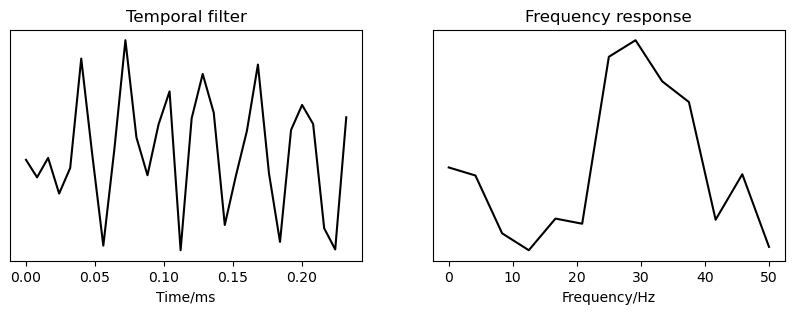

Temporal filter: 9


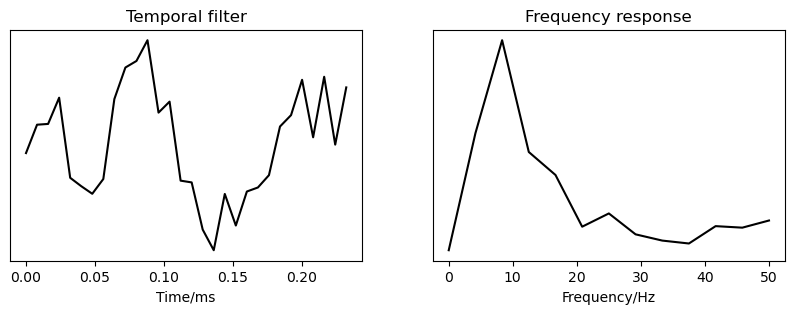

Temporal filter: 10


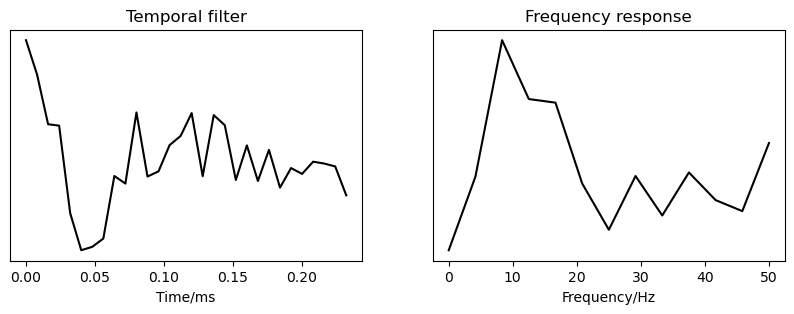

Temporal filter: 11


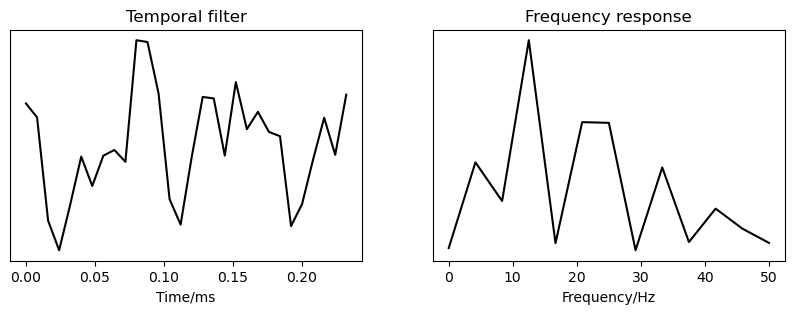

Temporal filter: 12


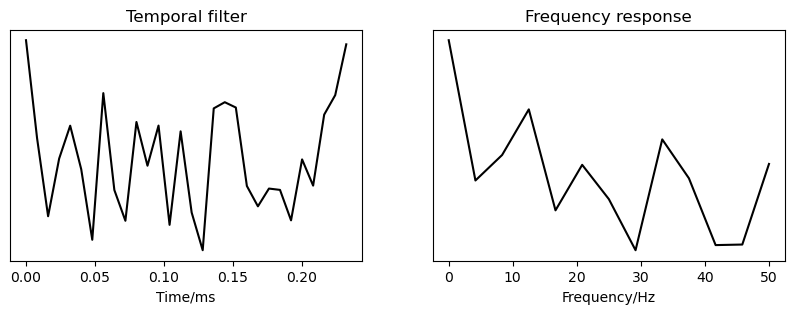

Temporal filter: 13


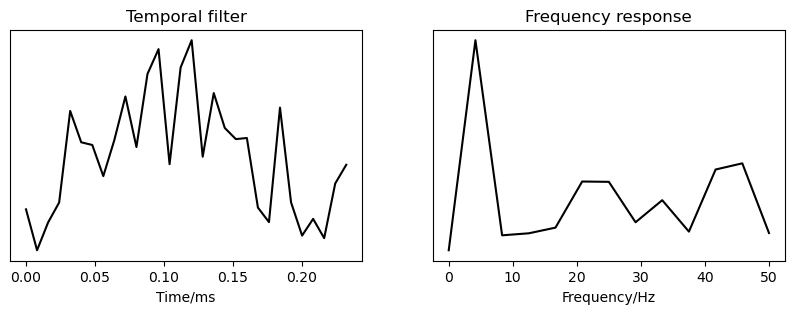

Temporal filter: 14


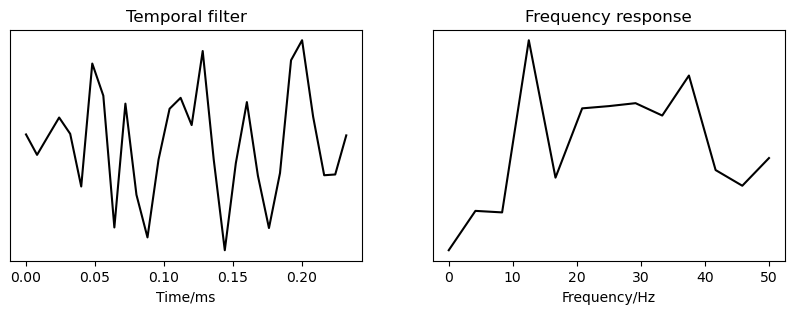

Temporal filter: 15


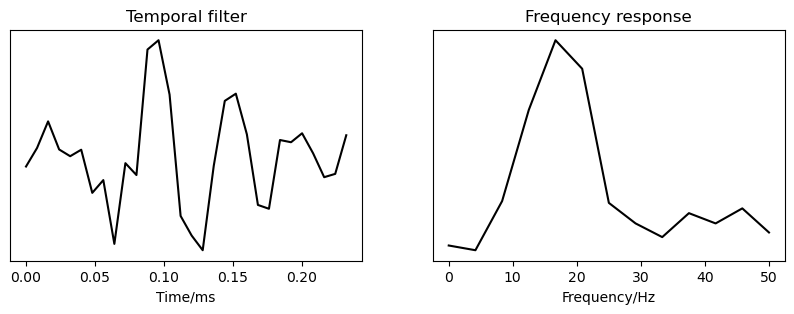

In [13]:
# Visualize the filters
# spatialWeight = torch.squeeze(state_dict['spatialConv.weight']).cpu().numpy()
timeWeight = torch.squeeze(state_dict['state_dict']['model.timeConv.weight']).cpu().numpy()
print(timeWeight.shape)

n_timeFilters = timeWeight.shape[0]

timeFilterLen = timeWeight.shape[1]
fs = 125
f = fs * np.arange(timeFilterLen) / timeFilterLen
time_inds = np.arange(16)
for i in range(len(time_inds)):
    print('Temporal filter: %d' % i)
    plt.figure(figsize=(10,3))
    sp = np.abs(np.fft.fft(timeWeight[time_inds[i], ::-1]))
    plt.subplot(121)
    plt.plot(np.arange(0,1/125*30,1/125), timeWeight[time_inds[i]], 'k')
    plt.yticks([])
    plt.xlabel('Time/ms')
    plt.title('Temporal filter')
    plt.subplot(122)
    plt.plot(f[f<=50], sp[f<=50], 'k')
    plt.yticks([])
    plt.xlabel('Frequency/Hz')
    plt.title('Frequency response')
    plt.show()


In [15]:
print(state_dict['state_dict']['model.msConv1.weight'].shape)

torch.Size([64, 1, 30, 3])


In [18]:
datadir = '/mnt/dataset0/**/AutoICA_Processed_EEG/Faced/Processed_data_filter_epoch_0.50_47_Auto_ICA_def_Threshold/data'
files = os.listdir(datadir)
files = sorted(files)
print(files)

['sub000.mat', 'sub001.mat', 'sub002.mat', 'sub003.mat', 'sub004.mat', 'sub005.mat', 'sub006.mat', 'sub007.mat', 'sub008.mat', 'sub009.mat', 'sub010.mat', 'sub011.mat', 'sub012.mat', 'sub013.mat', 'sub014.mat', 'sub015.mat', 'sub016.mat', 'sub017.mat', 'sub018.mat', 'sub019.mat', 'sub020.mat', 'sub021.mat', 'sub022.mat', 'sub023.mat', 'sub024.mat', 'sub025.mat', 'sub026.mat', 'sub027.mat', 'sub028.mat', 'sub029.mat', 'sub030.mat', 'sub031.mat', 'sub032.mat', 'sub033.mat', 'sub034.mat', 'sub035.mat', 'sub036.mat', 'sub037.mat', 'sub038.mat', 'sub039.mat', 'sub040.mat', 'sub041.mat', 'sub042.mat', 'sub043.mat', 'sub044.mat', 'sub045.mat', 'sub046.mat', 'sub047.mat', 'sub048.mat', 'sub049.mat', 'sub050.mat', 'sub051.mat', 'sub052.mat', 'sub053.mat', 'sub054.mat', 'sub055.mat', 'sub056.mat', 'sub057.mat', 'sub058.mat', 'sub059.mat', 'sub060.mat', 'sub061.mat', 'sub062.mat', 'sub063.mat', 'sub064.mat', 'sub065.mat', 'sub066.mat', 'sub067.mat', 'sub068.mat', 'sub069.mat', 'sub070.mat', 'sub0

In [20]:
tmp = sio.loadmat(os.path.join(datadir, files[0]))
print(tmp.keys())
print(tmp['data_all_cleaned'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'data_all_cleaned', 'n_samples_one', 'pre_info'])
(30, 228848)


In [21]:
data_all = np.zeros((123,30,228848))
for i in range(123):
    data_all[i] = sio.loadmat(os.path.join(datadir, files[i]))['data_all_cleaned']
data_all = data_all.transpose(0,2,1)

In [31]:
spatialWeight = torch.squeeze(state_dict['state_dict']['model.msConv4.weight']).cpu().numpy()
print(spatialWeight.shape)

(64, 30, 3)


In [ ]:
# Calculate data covariance for spatial activation
n_subs = 123
data_cov = np.zeros((data_all.shape[-1], data_all.shape[-1]))
for i in range(n_subs):
    data_cov = data_cov + np.dot(data_all[i,:,:].transpose(), data_all[i,:,:])
data_cov = data_cov / n_subs

['Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FC1', 'FC2', 'FC5', 'FC6', 'Cz', 'C3', 'C4', 'T7', 'T8', 'CP1', 'CP2', 'CP5', 'CP6', 'Pz', 'P3', 'P4', 'P7', 'P8', 'PO3', 'PO4', 'Oz', 'O1', 'O2']


/tmp/ipykernel_80182/920458686.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(ncols=6)


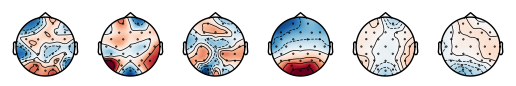

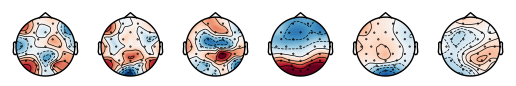

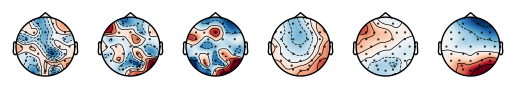

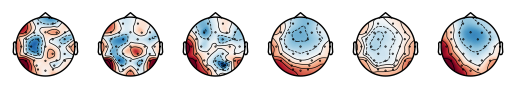

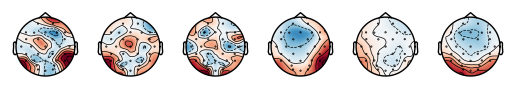

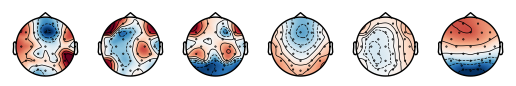

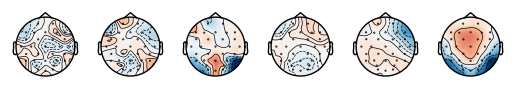

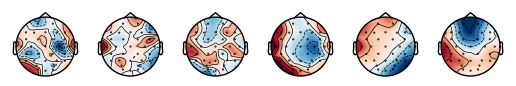

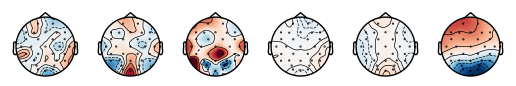

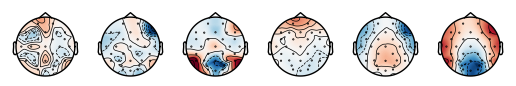

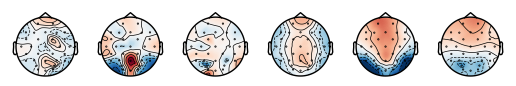

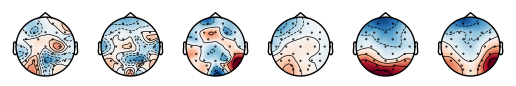

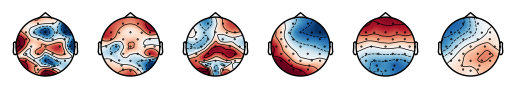

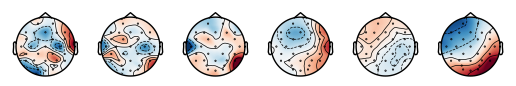

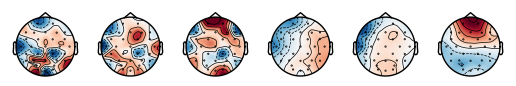

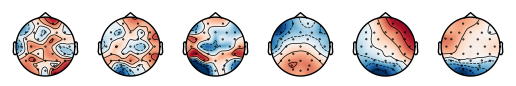

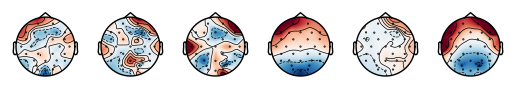

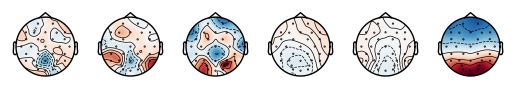

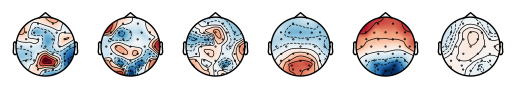

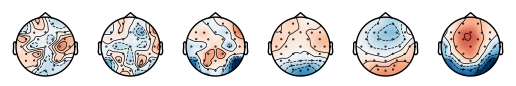

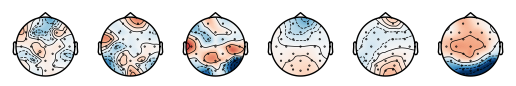

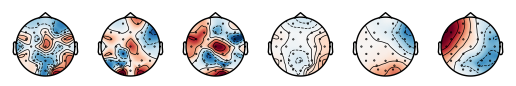

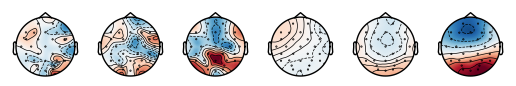

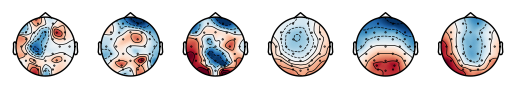

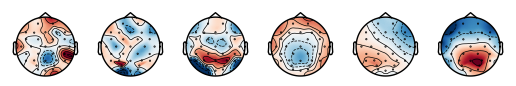

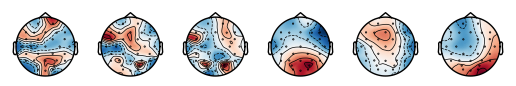

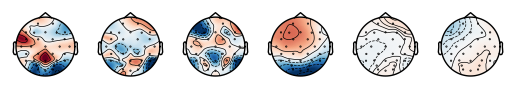

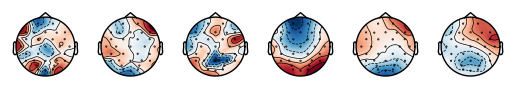

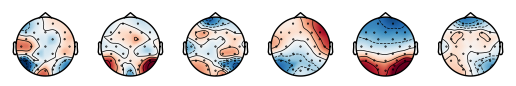

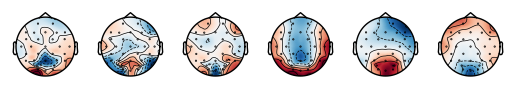

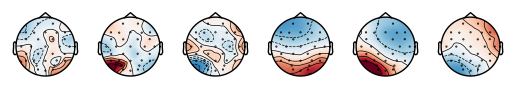

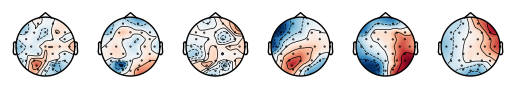

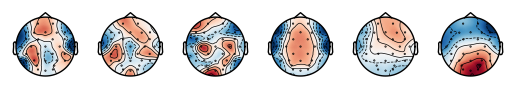

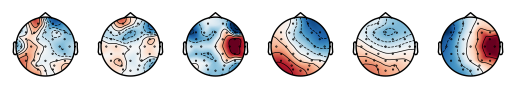

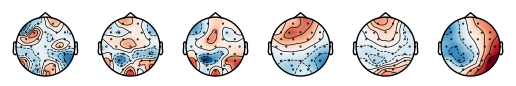

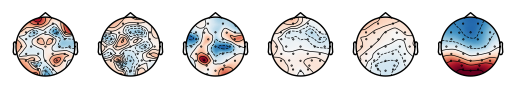

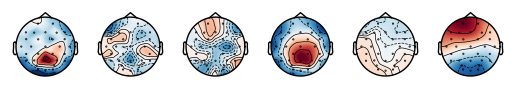

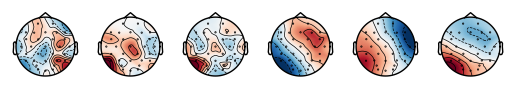

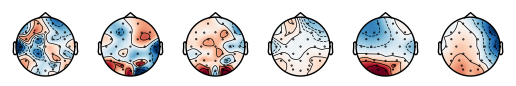

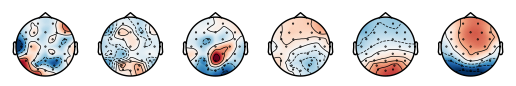

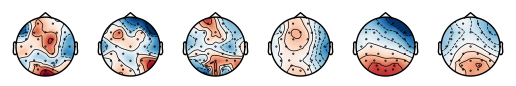

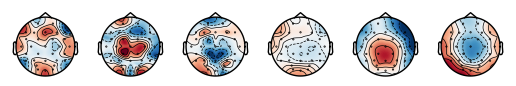

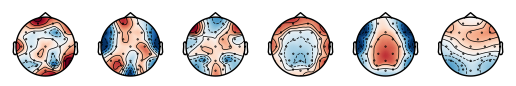

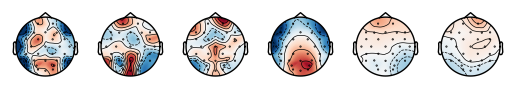

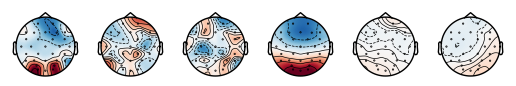

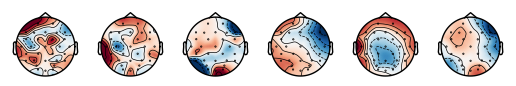

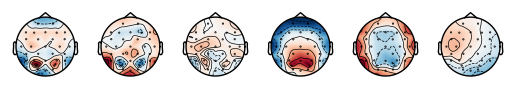

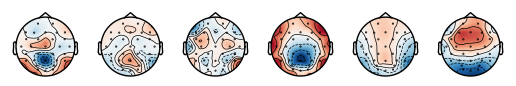

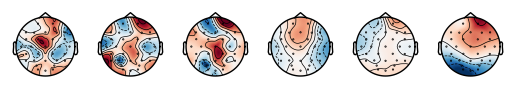

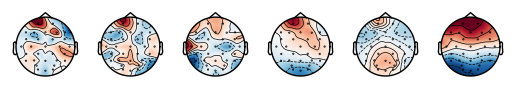

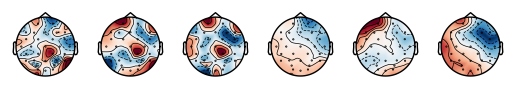

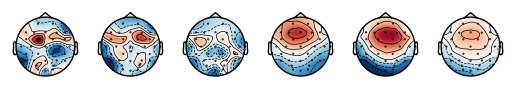

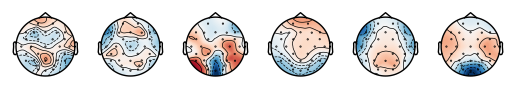

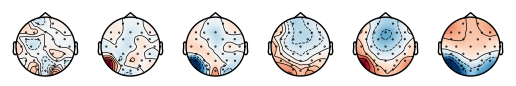

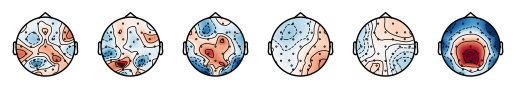

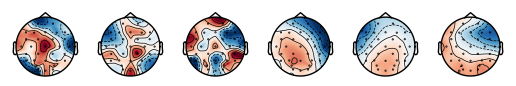

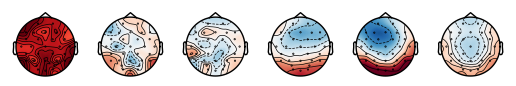

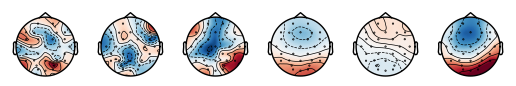

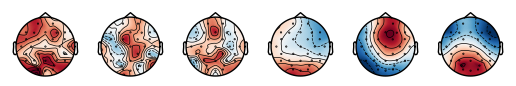

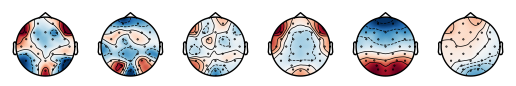

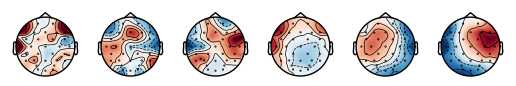

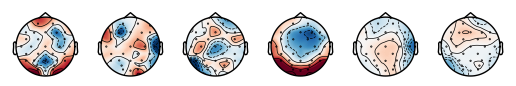

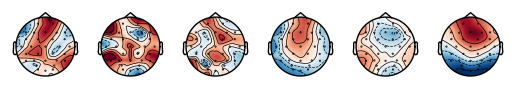

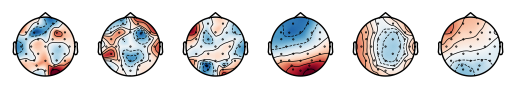

In [32]:
# Plot topo of spatial activation
# print(mne.channels.get_builtin_montages())
chn_names_array = sio.loadmat('/mnt/dataset0/**/AutoICA_Processed_EEG/Faced/Processed_data_filter_epoch_0.50_47_Auto_ICA_def_Threshold/EEG_label.mat')['EEG_label']
# print(chn_names_array[0][0][0])
chn_names = [chn_names_array[i][0][0] for i in range(len(chn_names_array))]
chn_names[14] = 'T7'
chn_names[15] = 'T8'
chn_names[23] = 'P7'
chn_names[24] = 'P8'
print(chn_names)
Info = mne.create_info(ch_names=chn_names, sfreq=125, ch_types='eeg')
Info.set_montage('biosemi32')

spatialActivation = np.zeros((64,30,3))
spatial_inds = np.arange(64)
for i in range(len(spatial_inds)):
    spatialActivation[i] = np.dot(data_cov, spatialWeight[i])

for i in range(len(spatial_inds)):
    w_curr = spatialWeight[spatial_inds[i]]
    a_curr = spatialActivation[spatial_inds[i]]
    vlim_max_w, vlim_max_a = np.max(np.abs(w_curr)), np.max(np.abs(a_curr))
    
    fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(ncols=6)
    im,cm   = mne.viz.plot_topomap(spatialWeight[spatial_inds[i],:,0].squeeze(), Info, axes=ax1,show=False, vlim=[-vlim_max_w,vlim_max_w])   
    
    im,cm   = mne.viz.plot_topomap(spatialWeight[spatial_inds[i],:,1].squeeze(), Info, axes=ax2,show=False, vlim=[-vlim_max_w,vlim_max_w])   
    
    im,cm   = mne.viz.plot_topomap(spatialWeight[spatial_inds[i],:,2].squeeze(), Info, axes=ax3,show=False, vlim=[-vlim_max_w,vlim_max_w])   
    # manually fiddle the position of colorbar
    # ax_x_start = 0.48
    # ax_x_width = 0.02
    # ax_y_start = 0.25
    # ax_y_height = 0.55
    # cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    # clb = fig.colorbar(im, cax=cbar_ax)
    
    
    
    im,cm   = mne.viz.plot_topomap(spatialActivation[spatial_inds[i],:,0].squeeze(), Info, axes=ax4,show=False, vlim=[-vlim_max_a,vlim_max_a])   
    
    im,cm   = mne.viz.plot_topomap(spatialActivation[spatial_inds[i],:,1].squeeze(), Info, axes=ax5,show=False, vlim=[-vlim_max_a,vlim_max_a])   
    
    im,cm   = mne.viz.plot_topomap(spatialActivation[spatial_inds[i],:,2].squeeze(), Info, axes=ax6,show=False, vlim=[-vlim_max_a,vlim_max_a])   
    # manually fiddle the position of colorbar
    # ax_x_start = 0.95
    # ax_x_width = 0.02
    # ax_y_start = 0.25
    # ax_y_height = 0.55
    # cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    # clb = fig.colorbar(im, cax=cbar_ax)

In [3]:
param_dir = '/home/ncclab/shen**/att_model/CLISA_Hydra/params/FACEDolddata/FACEDolddata/fold0/best_ext_cp.pth.tar'
state_dict = torch.load(param_dir)
print(state_dict['state_dict'].keys())

odict_keys(['timeConv.weight', 'timeConv.bias', 'msConv1.weight', 'msConv1.bias', 'msConv2.weight', 'msConv2.bias', 'msConv3.weight', 'msConv3.bias', 'msConv4.weight', 'msConv4.bias', 'att_conv.weight', 'att_conv.bias', 'att_pointConv.weight', 'att_pointConv.bias', 'timeConv1.weight', 'timeConv1.bias', 'timeConv2.weight', 'timeConv2.bias'])


In [4]:
print(state_dict['state_dict']['timeConv.weight'].shape)

torch.Size([16, 1, 1, 60])


odict_keys(['timeConv.weight', 'timeConv.bias', 'msConv1.weight', 'msConv1.bias', 'msConv2.weight', 'msConv2.bias', 'msConv3.weight', 'msConv3.bias', 'msConv4.weight', 'msConv4.bias', 'att_conv.weight', 'att_conv.bias', 'att_pointConv.weight', 'att_pointConv.bias', 'timeConv1.weight', 'timeConv1.bias', 'timeConv2.weight', 'timeConv2.bias'])
(16, 60)
Temporal filter: 0


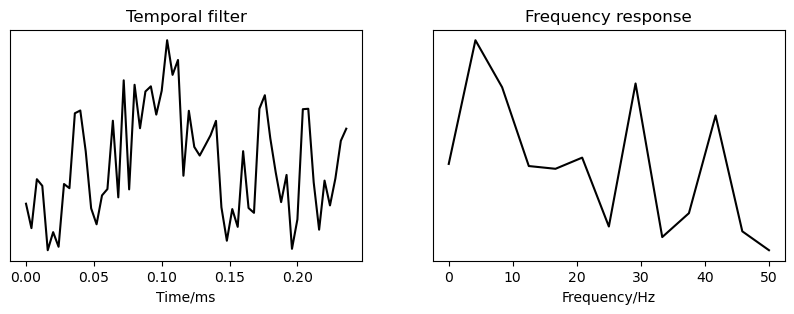

Temporal filter: 1


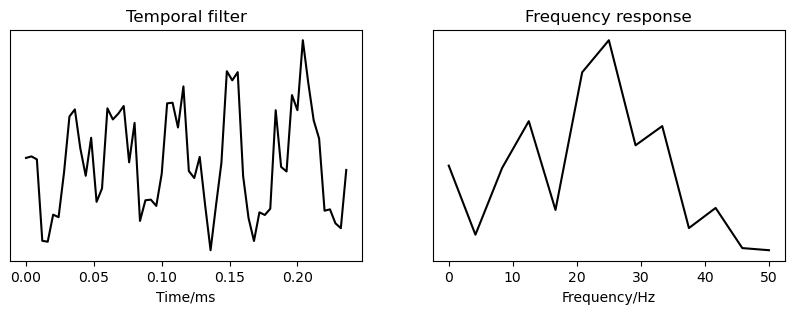

Temporal filter: 2


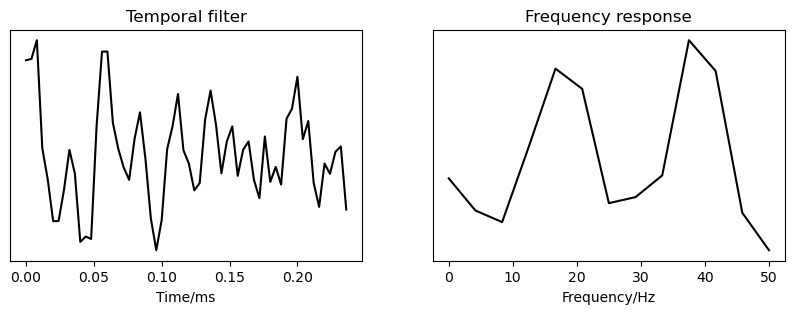

Temporal filter: 3


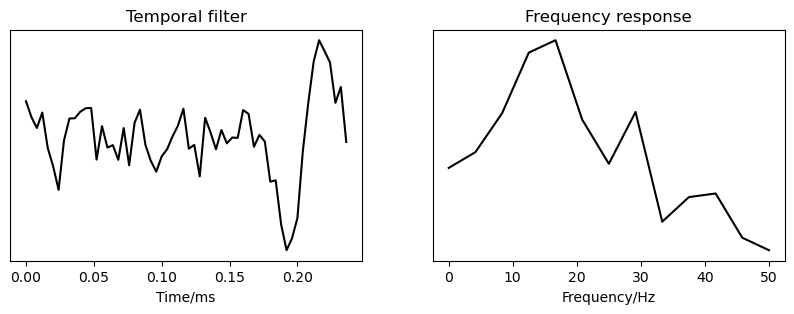

Temporal filter: 4


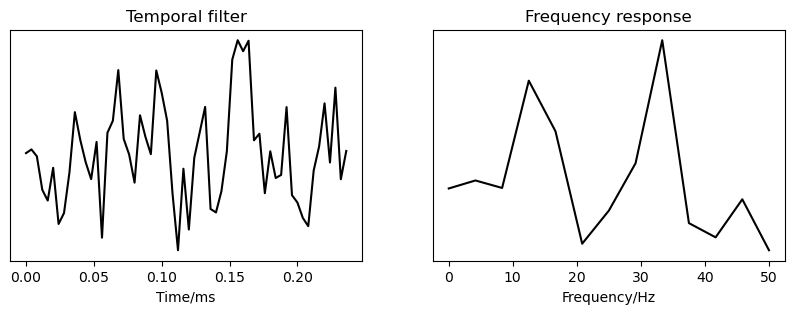

Temporal filter: 5


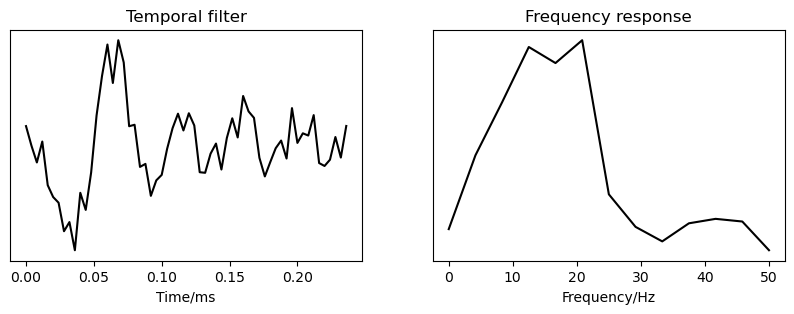

Temporal filter: 6


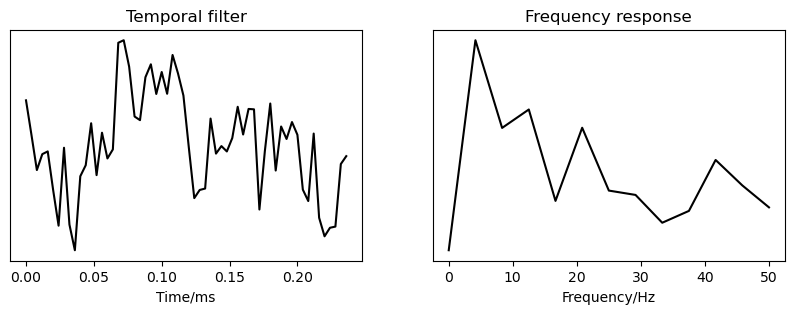

Temporal filter: 7


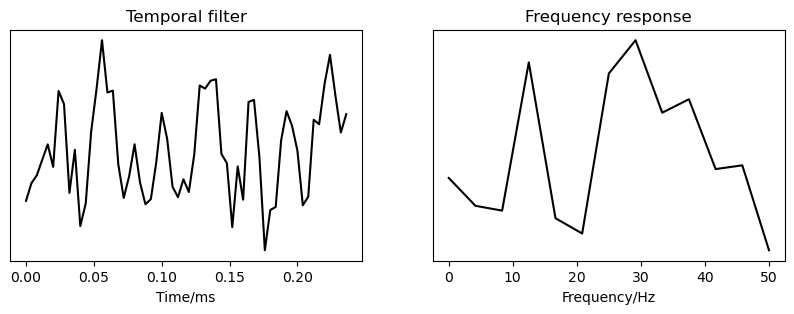

Temporal filter: 8


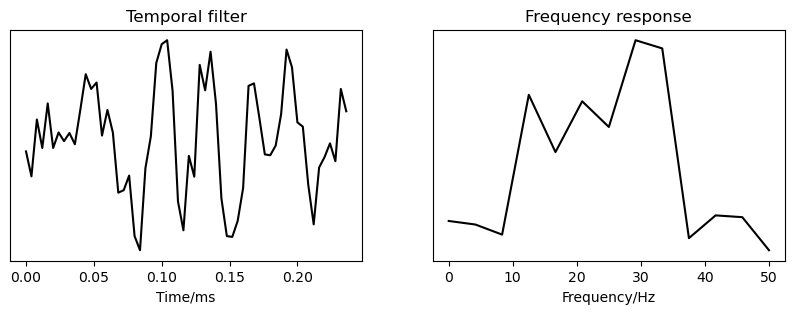

Temporal filter: 9


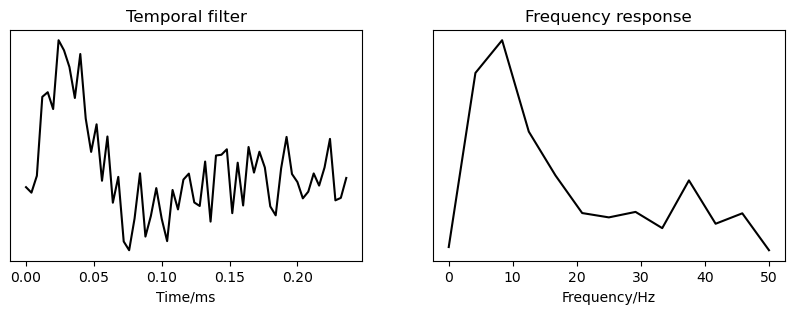

Temporal filter: 10


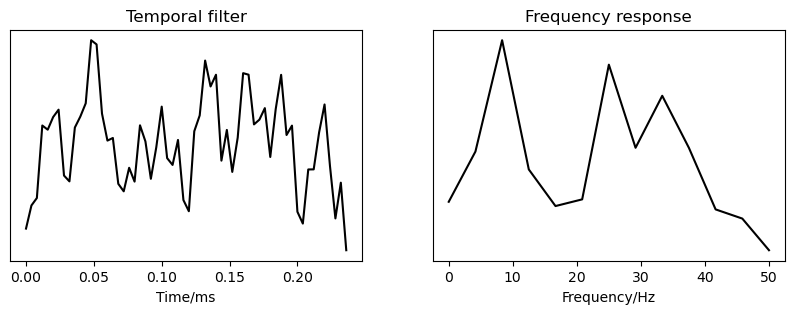

Temporal filter: 11


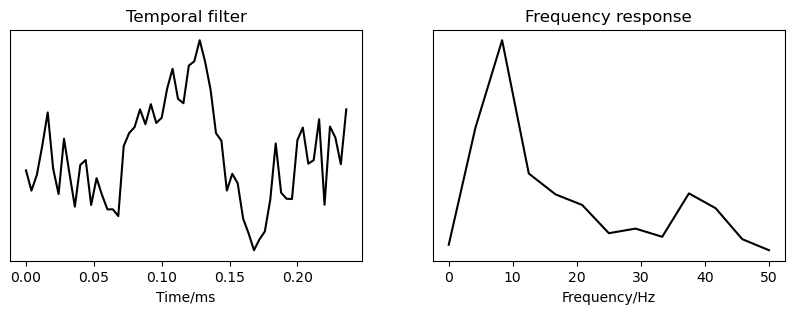

Temporal filter: 12


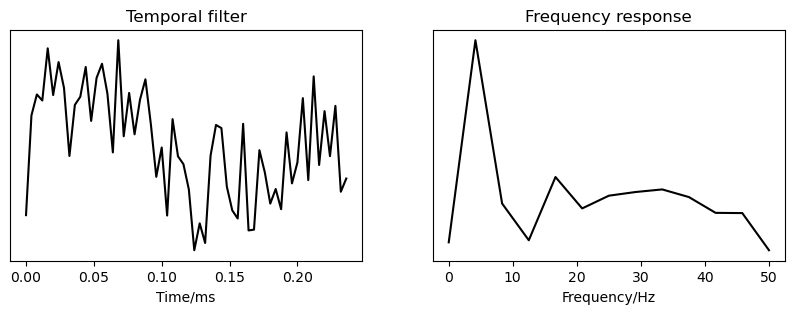

Temporal filter: 13


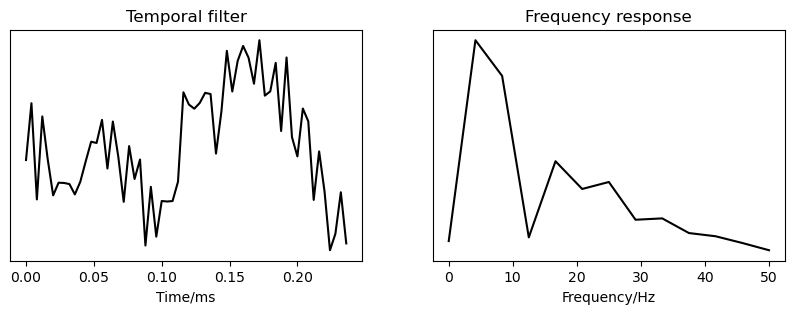

Temporal filter: 14


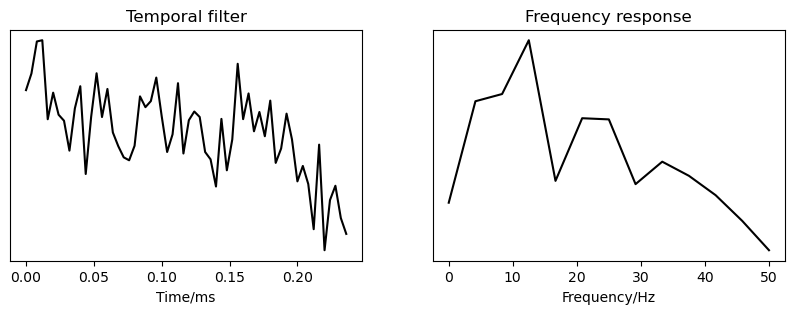

Temporal filter: 15


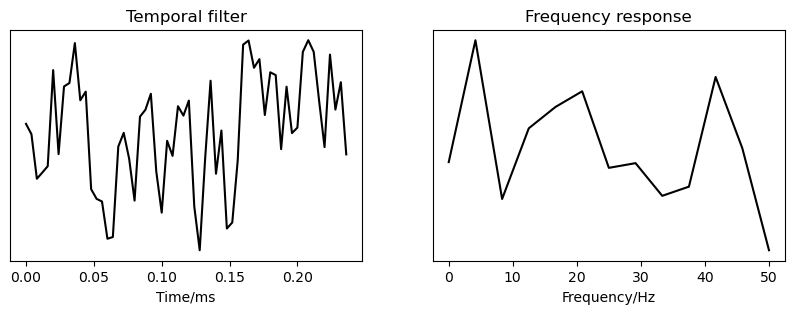

In [9]:
# Visualize the filters
param_dir = '/home/ncclab/shen**/att_model/CLISA_Hydra/params/FACEDolddata/FACEDolddata/fold0/best_ext_cp.pth.tar'
state_dict = torch.load(param_dir)['state_dict']
print(state_dict.keys())

# spatialWeight = torch.squeeze(state_dict['spatialConv.weight']).cpu().numpy()
timeWeight = torch.squeeze(state_dict['timeConv.weight']).cpu().numpy()
print(timeWeight.shape)

n_timeFilters = timeWeight.shape[0]

timeFilterLen = timeWeight.shape[1]
fs = 250
f = fs * np.arange(timeFilterLen) / timeFilterLen
time_inds = np.arange(16)
for i in range(len(time_inds)):
    print('Temporal filter: %d' % i)
    plt.figure(figsize=(10,3))
    sp = np.abs(np.fft.fft(timeWeight[time_inds[i], ::-1]))
    plt.subplot(121)
    plt.plot(np.arange(0,1/250*60,1/250), timeWeight[time_inds[i]], 'k')
    plt.yticks([])
    plt.xlabel('Time/ms')
    plt.title('Temporal filter')
    plt.subplot(122)
    plt.plot(f[f<=50], sp[f<=50], 'k')
    plt.yticks([])
    plt.xlabel('Frequency/Hz')
    plt.title('Frequency response')
    plt.show()


In [ ]:
### Extract representations

In [40]:
run=2
dataset='FACED'
gpus='[0]'
proj_name="$dataset""_test_loo"
valid_method='loo'
iftest=False

!python extract_fea_forInterp.py log.run=$run log.proj_name=$proj_name data=$dataset \
                      model.timeFilterLen=30 model.dilation_array=[1,3,6,12] \
                      model.seg_att=15 model.avgPoolLen=15 model.timeSmootherLen=3 \
                      train.gpus=$gpus train.valid_method=$valid_method \
                      train.num_workers=8 \
                      train.iftest=$iftest

/home/ncclab/miniconda3/envs/att_model/lib/python3.11/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
/mnt/dataset0/**/AutoICA_Processed_EEG/Faced/Processed_data_filter_epoch_0.50_47_Auto_ICA_def_Threshold/data
[2024-05-16 15:47:24,719][__main__][INFO] - fold:0
[2024-05-16 15:47:24,720][__main__][INFO] - train_subs:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,

In [43]:
fea = np.load('/mnt/dataset0/**/AutoICA_Processed_EEG/Faced/Processed_data_filter_epoch_0.50_47_Auto_ICA_def_Threshold/ext_fea/fea_r2/_r2_f0_fea_me.npy')
print(fea.shape)

(103320, 256)


In [46]:
label = np.load('/mnt/dataset0/**/AutoICA_Processed_EEG/Faced/Processed_data_filter_epoch_0.50_47_Auto_ICA_def_Threshold/ext_fea/fea_r2/onesub_label2.npy')
print(len(label))

840


In [53]:
run=2
dataset='FACED'
gpus='[0]'
proj_name="$dataset""_test_loo"
valid_method='loo'
iftest=True

!export HYDRA_FULL_ERROR=1
!python interp_mlp.py log.run=$run log.proj_name=$proj_name data=$dataset \
                    model.timeFilterLen=30 model.dilation_array=[1,3,6,12] \
                    model.seg_att=15 model.avgPoolLen=15 model.timeSmootherLen=3 \
                    train.gpus=$gpus train.valid_method=$valid_method \
                    train.num_workers=8 \
                    hydra/job_logging=$logging train.iftest=$iftest

/home/ncclab/miniconda3/envs/att_model/lib/python3.11/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
In 'config': Could not find 'data/'

Available options in 'data':
	FACED
	SEED
	SEEDV
Config search path:
	provider=hydra, path=pkg://hydra.conf
	provider=main, path=file:///home/ncclab/shen**/att_model/CLISA_Hydra/cfgs
	provider=schema, path=structured://

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.
